In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
data=pd.read_csv(r"C:\Users\Aditya\Downloads\weatherAUS.csv")
pd.set_option('display.max_columns',23)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [69]:
data.shape

(8425, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:
#categories in object dtype
data.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
Date,8425,3004,2011-02-23,5
Location,8425,12,Melbourne,1622
WindGustDir,7434,16,N,713
WindDir9am,7596,16,N,906
WindDir3pm,8117,16,SE,813
RainToday,8185,2,No,6195
RainTomorrow,8186,2,No,6195


In [70]:
data['Date']=pd.to_datetime(data['Date'],format="%Y/%m/%d")
data['year']=pd.to_datetime(data.Date,format="%Y/%m/%d").dt.year
data['month']=pd.to_datetime(data.Date,format="%Y/%m/%d").dt.month
data['day']=pd.to_datetime(data.Date,format="%Y/%m/%d").dt.day

In [71]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [72]:
#droping original column
data.drop('Date',axis=1,inplace=True)

In [73]:
data.isnull().sum()*100/len(data)

Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
year              0.000000
month             0.000000
day               0.000000
dtype: float64

In [74]:
data1=data.copy()

In [75]:
float_columns=data.select_dtypes(include=['float64']).columns
object_columns=data.select_dtypes(include=['object']).columns

In [76]:
#fill nan values with mean()
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data[float_columns]=imp_mean.fit_transform(data[float_columns])

In [77]:
#fill nan values in object dtype with mode
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[object_columns]=imp_mode.fit_transform(data[object_columns])

In [78]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

univariate analysis

In [79]:
data[object_columns]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
8420,Uluru,E,SE,ENE,No,No
8421,Uluru,NNW,SE,N,No,No
8422,Uluru,N,SE,WNW,No,No
8423,Uluru,SE,SSE,N,No,No


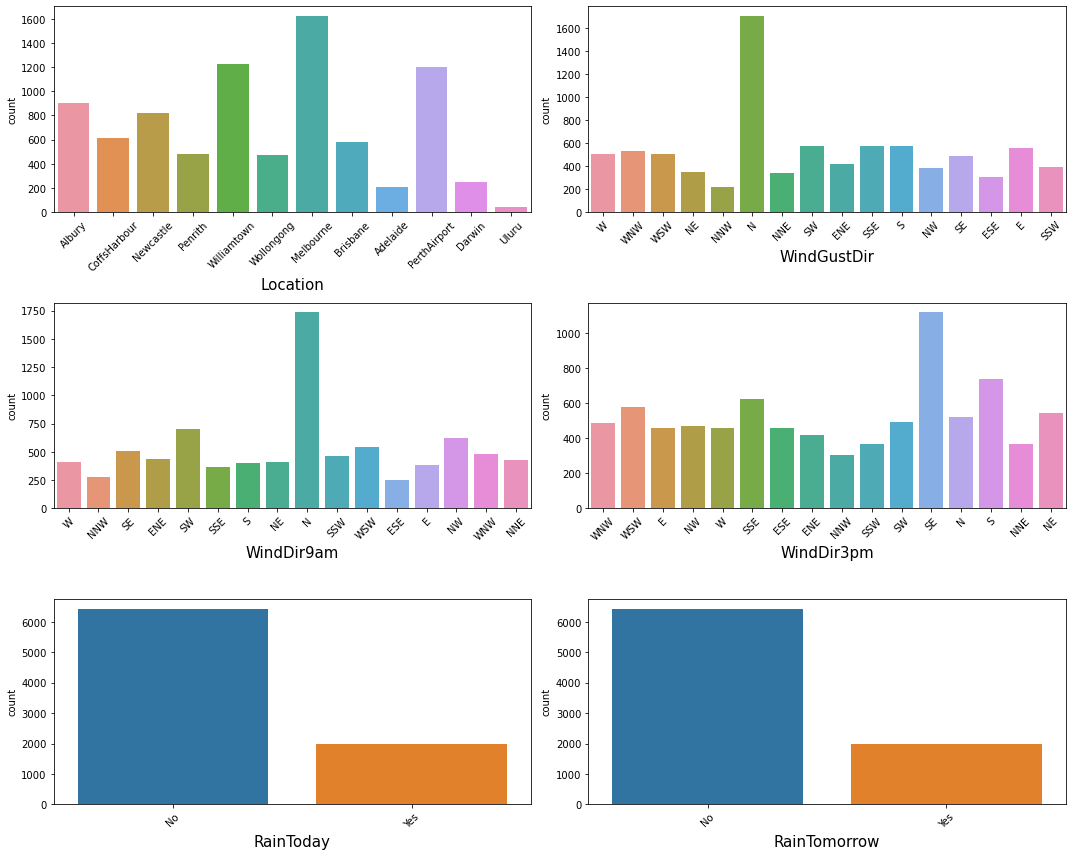

In [80]:
plt.figure(figsize=(15,12))
plotnumber=1
for column in data[object_columns]:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.countplot(data[object_columns][column])
        plt.xlabel(column,fontsize=15)
        plt.xticks(rotation=45)
        
    plotnumber+=1
    
plt.tight_layout()

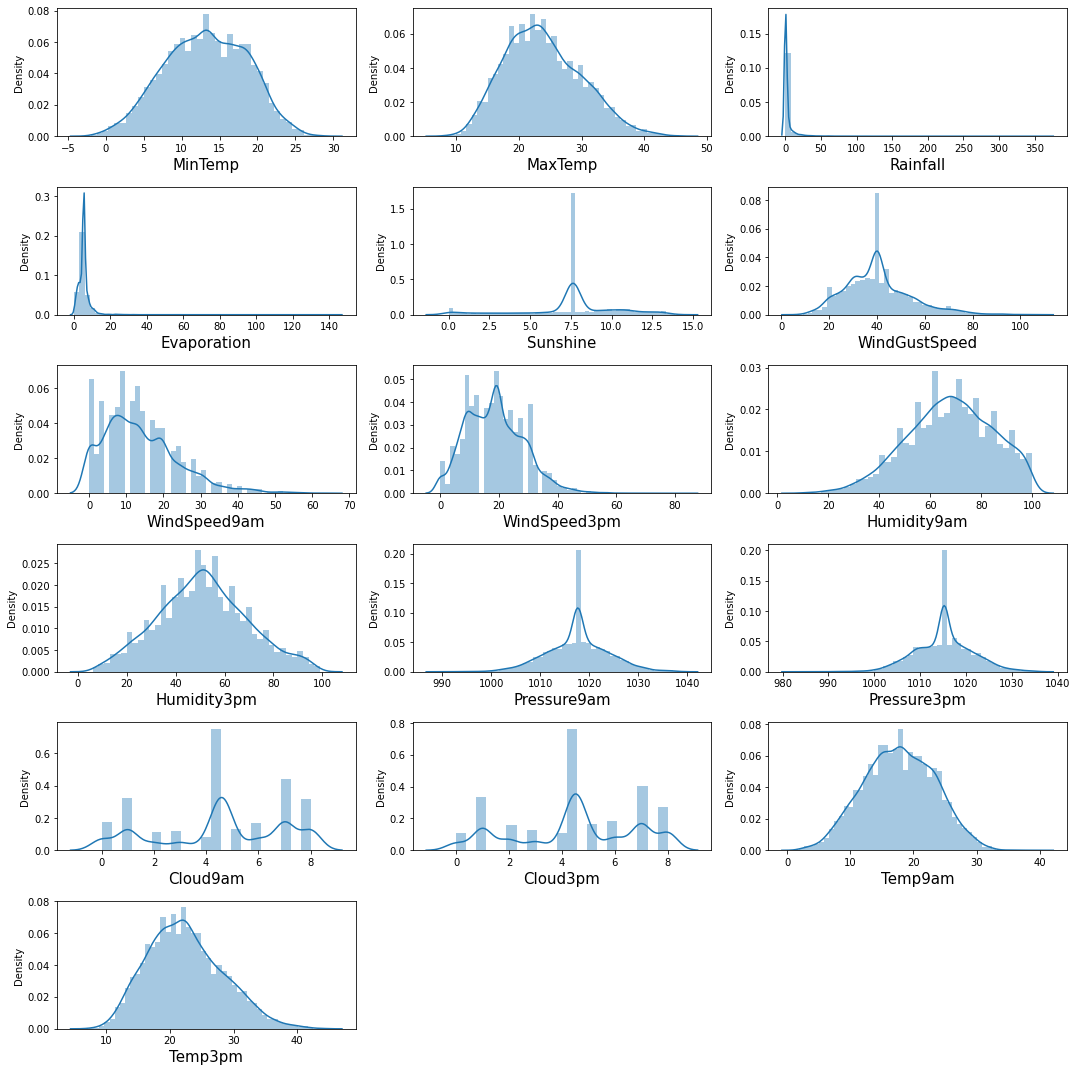

In [81]:
plt.figure(figsize=(15,15))
plotnumber=1
for column in data[float_columns]:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(data[float_columns][column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
    
plt.tight_layout()

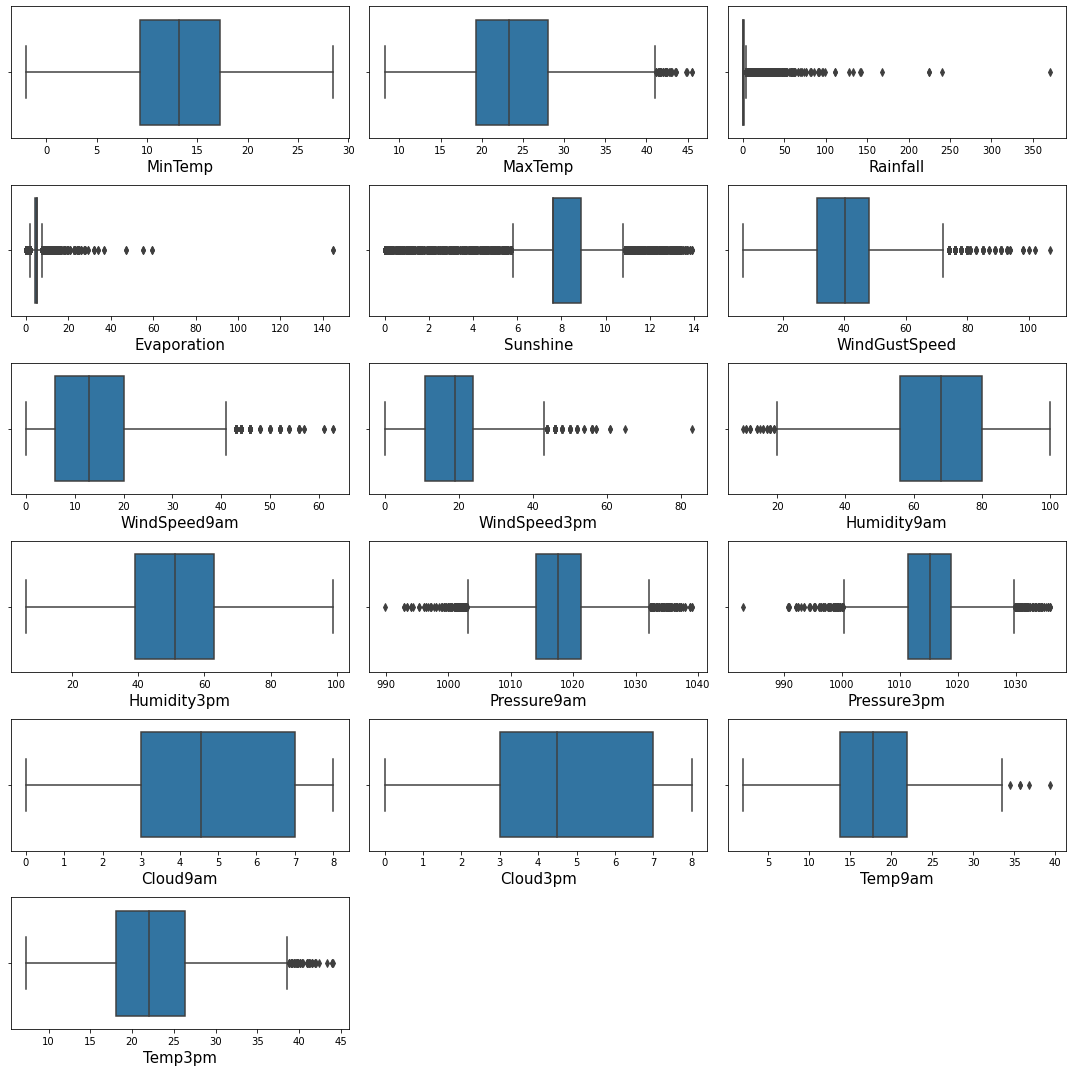

In [82]:
plt.figure(figsize=(15,15))
plotnumber=1
for column in data[float_columns]:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(data[float_columns][column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
    
plt.tight_layout()

In [83]:
out_cols=['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']

In [84]:
from scipy.stats import zscore
z_score=zscore(data[out_cols])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=data[filtering_entry]

In [85]:
df.shape

(7987, 25)

In [86]:
#data_loss
((8425-7987)/8425)*100

5.198813056379822

In [87]:
df['RainTomorrow'].value_counts()

No     6165
Yes    1822
Name: RainTomorrow, dtype: int64

In [88]:
#data loss percent is lesss than 6% so it is in acceptable range 

In [89]:
df[float_columns].skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.488446
Evaporation      0.846181
Sunshine        -0.723970
WindGustSpeed    0.506897
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
dtype: float64

In [90]:
#observation:-
#from the distplot of float _columns rainfall is highly right skewed and evoparation also we use power transformation for these two features
#sunshine and windspeed9am is right skewed i can use power transformation

In [91]:
cols=['Rainfall','Evaporation','Sunshine','WindSpeed9am']
from sklearn.preprocessing import PowerTransformer
ptr=PowerTransformer()
df[cols]=ptr.fit_transform(df[cols])

In [92]:
df[cols].skew()

Rainfall        0.913570
Evaporation     0.074744
Sunshine       -0.066263
WindSpeed9am   -0.111481
dtype: float64

In [93]:
df.shape

(7987, 25)

In [94]:
#label encoder for 2 categories columns
cols2=['RainToday','RainTomorrow']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[cols2]=df[cols2].apply(le.fit_transform)

In [95]:
df['RainTomorrow'].value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

In [96]:
from category_encoders import BinaryEncoder
bi_enc=BinaryEncoder()

d1=bi_enc.fit_transform(df[['Location','WindGustDir','WindDir9am','WindDir3pm']])

In [97]:
d1

,Location_0,Location_1,Location_2,Location_3,WindGustDir_0,WindGustDir_1,WindGustDir_2,WindGustDir_3,WindGustDir_4,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4
0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1
4,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,0,0
8421,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,1,0,1
8422,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1
8423,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,1


In [98]:
df1=pd.concat([df,d1],axis=1)
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,WindGustDir_4,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4
0,Albury,13.4,22.900000,0.617396,0.186311,-0.097439,W,44.000000,W,WNW,0.784361,...,1,0,0,0,0,1,0,0,0,0,1
1,Albury,7.4,25.100000,-0.693670,0.186311,-0.097439,WNW,44.000000,NNW,WSW,-0.983463,...,0,0,0,0,1,0,0,0,0,1,0
2,Albury,12.9,25.700000,-0.693670,0.186311,-0.097439,WSW,46.000000,W,WSW,0.700314,...,1,0,0,0,0,1,0,0,0,1,0
3,Albury,9.2,28.000000,-0.693670,0.186311,-0.097439,NE,24.000000,SE,E,-0.063397,...,0,0,0,0,1,1,0,0,0,1,1
4,Albury,17.5,32.300000,0.975076,0.186311,-0.097439,W,41.000000,ENE,NW,-0.541317,...,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,-0.693670,0.186311,-0.097439,E,31.000000,SE,ENE,0.146229,...,0,0,0,0,1,1,0,1,0,0,0
8421,Uluru,3.6,25.300000,-0.693670,0.186311,-0.097439,NNW,22.000000,SE,N,0.146229,...,1,0,0,0,1,1,0,1,1,0,1
8422,Uluru,5.4,26.900000,-0.693670,0.186311,-0.097439,N,37.000000,SE,WNW,-0.290718,...,0,0,0,0,1,1,0,0,0,0,1
8423,Uluru,7.8,27.000000,-0.693670,0.186311,-0.097439,SE,28.000000,SSE,N,0.146229,...,0,0,0,1,1,0,0,1,1,0,1


In [99]:
df1.drop(['Location','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [100]:
df1.shape

(7987, 40)

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7987 entries, 0 to 8424
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        7987 non-null   float64
 1   MaxTemp        7987 non-null   float64
 2   Rainfall       7987 non-null   float64
 3   Evaporation    7987 non-null   float64
 4   Sunshine       7987 non-null   float64
 5   WindGustSpeed  7987 non-null   float64
 6   WindSpeed9am   7987 non-null   float64
 7   WindSpeed3pm   7987 non-null   float64
 8   Humidity9am    7987 non-null   float64
 9   Humidity3pm    7987 non-null   float64
 10  Pressure9am    7987 non-null   float64
 11  Pressure3pm    7987 non-null   float64
 12  Cloud9am       7987 non-null   float64
 13  Cloud3pm       7987 non-null   float64
 14  Temp9am        7987 non-null   float64
 15  Temp3pm        7987 non-null   float64
 16  RainToday      7987 non-null   int32  
 17  RainTomorrow   7987 non-null   int32  
 18  year    

<AxesSubplot:>

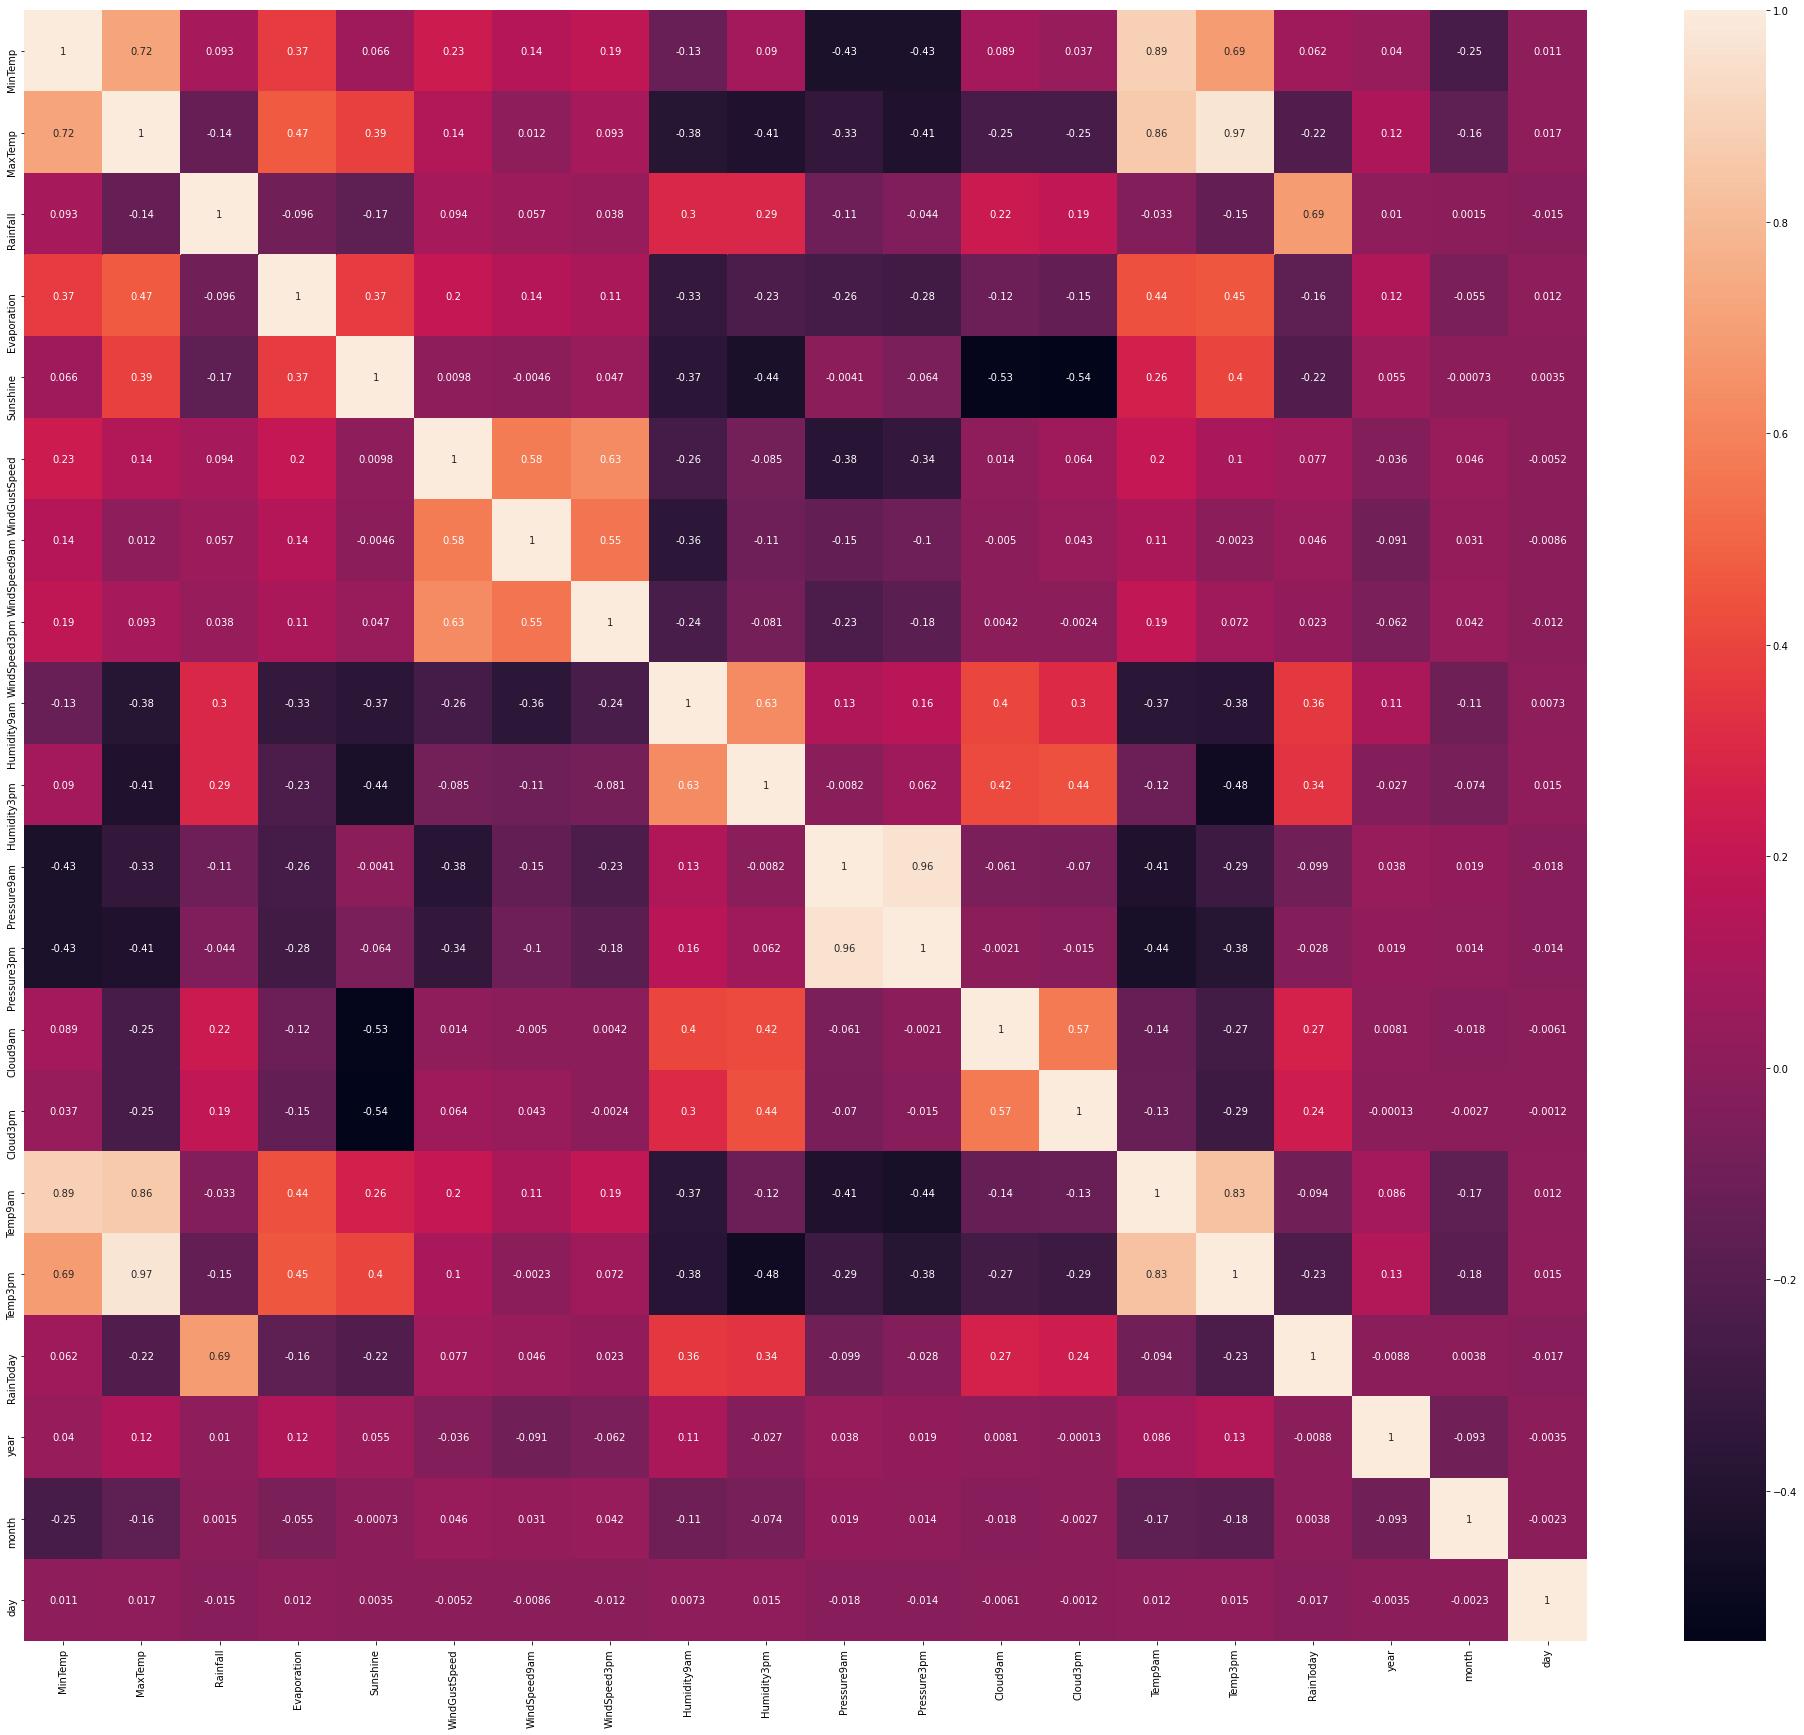

In [82]:
plt.figure(figsize=(35,30))
sns.heatmap(df1.drop('RainTomorrow',axis=1).corr(),annot=True)

In [40]:
#observation:-
#pressure3pm and pressure 9am are highly correlated
#temparature3pm and maxtemp are highly correlated
#temparature9am and min Temp are correlates highly

In [102]:
df.drop(['Pressure9am','Temp9am','MaxTemp'],axis=1,inplace=True)

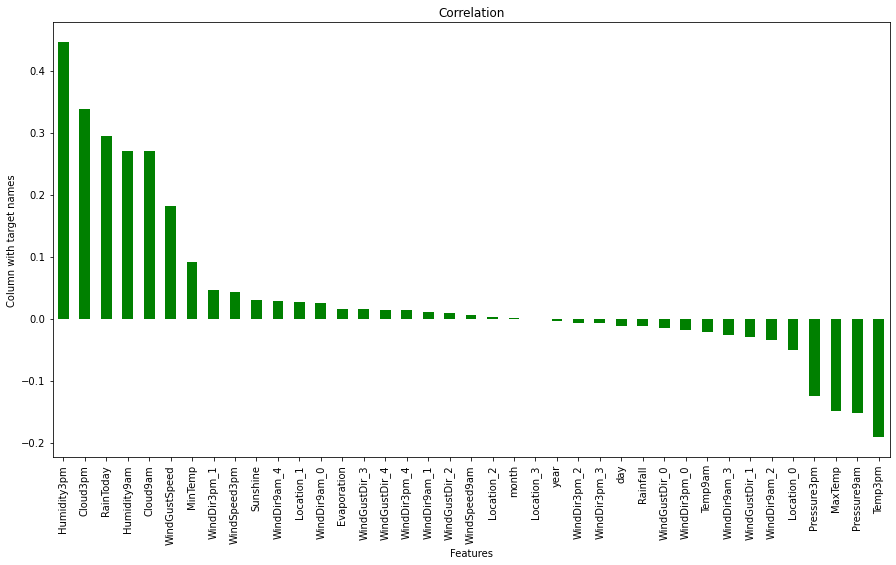

In [474]:
plt.figure(figsize =(15, 8),facecolor='white')
df1.corr()['RainTomorrow'].sort_values(ascending = False).drop(['RainTomorrow']).plot(kind ='bar', color ='green')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()


In [103]:
#split the data into dependent and independent
X=df1.drop('RainTomorrow',axis=1)
y=df1['RainTomorrow']

In [104]:
X.shape

(7987, 39)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

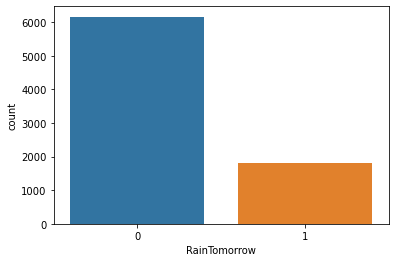

In [105]:
sns.countplot(y)

In [106]:
X.shape,y.shape

((7987, 39), (7987,))

In [107]:
#balance the target variable by using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [108]:
X.shape,y.shape

((12330, 39), (12330,))

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

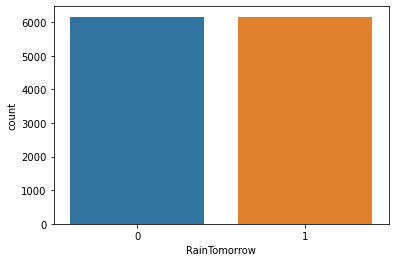

In [135]:
sns.countplot(y)

In [109]:
#standardizing the data
from sklearn .preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=pd.DataFrame(scale.fit_transform(X),columns=X.columns)

In [110]:
x.shape

(12330, 39)

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
lr=LogisticRegression()

In [112]:
#finding best random state 
maxAccu=0
maxRS=0
for i in range(1,800):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    predx=lr.predict(x_test)
    acc=accuracy_score(y_test,predx)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('best accuracy is',maxAccu,'on random_state',maxRS)   

best accuracy is 0.8563087901394746 on random_state 752


In [113]:
#here the random state 752 is given best accuracy 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=752)

In [114]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n==========train results============")
        print(f'accuracy score:{accuracy_score(y_train,y_pred)*100:2f}%')
        
    elif train==False:
        pred=clf.predict(x_test)
        print('\n=========test reslts===========')
        print(f'accuracy score is:{accuracy_score(y_test,pred)*100:2f}%')
        print('\n')
        print(confusion_matrix(y_test,pred))
        print('\n')
        print(classification_report(y_test,pred))
        scr=cross_val_score(clf,x,y,cv=10)
        print('cross validation score on',clf, 'is',scr.mean())

In [115]:
# Logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:83.151292%

=========test reslts===========
accuracy score is:85.630879%


[[1333  201]
 [ 242 1307]]


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1534
           1       0.87      0.84      0.86      1549

    accuracy                           0.86      3083
   macro avg       0.86      0.86      0.86      3083
weighted avg       0.86      0.86      0.86      3083

cross validation score on LogisticRegression() is 0.7608272506082725


In [116]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print_score(knn,x_train,x_test,y_train,y_test,train=True)
print_score(knn,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:90.040013%

=========test reslts===========
accuracy score is:86.636393%


[[1336  198]
 [ 214 1335]]


              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1534
           1       0.87      0.86      0.87      1549

    accuracy                           0.87      3083
   macro avg       0.87      0.87      0.87      3083
weighted avg       0.87      0.87      0.87      3083

cross validation score on KNeighborsClassifier() is 0.7376317923763179


In [117]:
#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dcfr=DecisionTreeClassifier()
dcfr.fit(x_train,y_train)
print_score(dcfr,x_train,x_test,y_train,y_test,train=True)
print_score(dcfr,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:100.000000%

=========test reslts===========
accuracy score is:88.031139%


[[1343  191]
 [ 178 1371]]


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1534
           1       0.88      0.89      0.88      1549

    accuracy                           0.88      3083
   macro avg       0.88      0.88      0.88      3083
weighted avg       0.88      0.88      0.88      3083

cross validation score on DecisionTreeClassifier() is 0.815896188158962


In [118]:
#random forest classifier 
from sklearn.ensemble import RandomForestClassifier
rfclf=RandomForestClassifier()
rfclf.fit(x_train,y_train)
print_score(rfclf,x_train,x_test,y_train,y_test,train=True)
print_score(rfclf,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:100.000000%

=========test reslts===========
accuracy score is:94.161531%


[[1446   88]
 [  92 1457]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1534
           1       0.94      0.94      0.94      1549

    accuracy                           0.94      3083
   macro avg       0.94      0.94      0.94      3083
weighted avg       0.94      0.94      0.94      3083

cross validation score on RandomForestClassifier() is 0.8652879156528792


In [119]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:91.143073%

=========test reslts===========
accuracy score is:89.847551%


[[1416  118]
 [ 195 1354]]


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1534
           1       0.92      0.87      0.90      1549

    accuracy                           0.90      3083
   macro avg       0.90      0.90      0.90      3083
weighted avg       0.90      0.90      0.90      3083

cross validation score on SVC() is 0.7600162206001622


In [120]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

gbdt.fit(x_train,y_train)
print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:88.060993%

=========test reslts===========
accuracy score is:88.777165%


[[1379  155]
 [ 191 1358]]


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1534
           1       0.90      0.88      0.89      1549

    accuracy                           0.89      3083
   macro avg       0.89      0.89      0.89      3083
weighted avg       0.89      0.89      0.89      3083

cross validation score on GradientBoostingClassifier() is 0.7609083536090835


In [121]:
#plotting ROC AUC curve 
from sklearn.metrics import plot_roc_curve,roc_auc_score


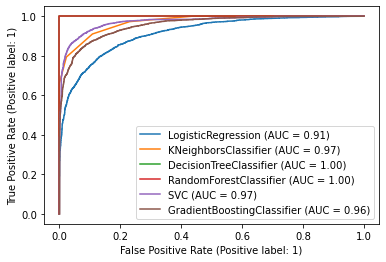

In [149]:
#how wel our model is works on training data 
disp=plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dcfr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfclf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(gbdt,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

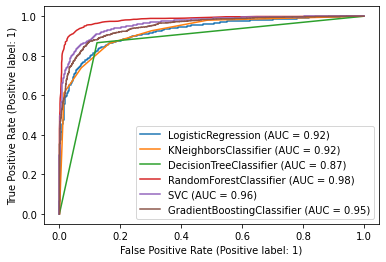

In [150]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dcfr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfclf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [ ]:
#random forest gives best score so i choose random forest as the final model

In [151]:
#hyper prameter tunning 
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
params={'criterion':['entropy','gini'],
            'n_estimators':[13,18],
            'max_depth' :[6,9],
            'min_samples_split':[6,11],
            'min_samples_leaf':[4,7],
            'max_features':['auto','sqrt','log2']
             }

In [152]:
Grdcv=GridSearchCV(RandomForestClassifier(),params,cv=10,scoring='accuracy')
Grdcv.fit(x_train,y_train)
Grdcv.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 18}

In [153]:
rfc=RandomForestClassifier(criterion='entropy',max_features='auto',max_depth=9, min_samples_leaf=4,min_samples_split=6,n_estimators=18)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

rf_conf_mat=confusion_matrix(y_test,y_pred)


In [154]:
rf_conf_mat

array([[1372,  159],
       [ 193, 1359]], dtype=int64)

In [155]:
print('accuracy score \n',accuracy_score(y_test,y_pred))

accuracy score 
 0.88582549464807


In [156]:
print(classification_report(y_test,y_pred))      

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1531
           1       0.90      0.88      0.89      1552

    accuracy                           0.89      3083
   macro avg       0.89      0.89      0.89      3083
weighted avg       0.89      0.89      0.89      3083



In [157]:
import joblib
joblib.dump(rfc,'rain_prediction.obj')

['rain_prediction.obj']

In [158]:
model=joblib.load('rain_prediction.obj')
pred=model.predict(x_test)
predict_values=pd.DataFrame({'actual':y_test,'predict':pred})

In [159]:
predict_values

,actual,predict
1873,0,0
7678,1,1
1653,0,1
11055,1,1
5478,0,0
...,...,...
4187,0,0
11409,1,1
9718,1,1
11949,1,1


# predicting  rainfall 

In [11]:
data1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [12]:
data1.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
year                0
month               0
day                 0
dtype: int64

In [13]:
data1.shape

(8425, 25)

In [14]:
#since rainfall is our target variable so i cannot impute nan values with mean median and mode i can drop nan values in our taret variable
data1= data1[data1['Rainfall'].notna()]

In [15]:
data1.shape

(8185, 25)

In [16]:
data1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
8421,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
8422,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23
8423,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,...,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


# imputation of nan values 

In [17]:
#seperating data based on dtype
float_columns=data1.select_dtypes(include=['float64']).columns
object_columns=data1.select_dtypes(include=['object']).columns

In [18]:
#fill nan values with mean()
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data1[float_columns]=imp_mean.fit_transform(data1[float_columns])

In [19]:
#fill nan values in object dtype with mode
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data1[object_columns]=imp_mode.fit_transform(data1[object_columns])

In [20]:
data1.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [21]:
data1.shape

(8185, 25)

In [22]:
#removing outliers
out_cols=['MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']

from scipy.stats import zscore
z_score=zscore(data1[out_cols])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
data1=data1[filtering_entry]

In [23]:
data1.shape

(7861, 25)

In [24]:
#data loss
((8185-7861)/8185)*100

3.958460598656078

In [25]:
X=data1.drop('Rainfall',axis=1)
y=data1['Rainfall']

In [26]:
#make sure X and y lengths must be equal
X.shape,y.shape

((7861, 24), (7861,))

In [27]:
#loss % of data is in acceptable range
X.skew()

MinTemp         -0.083924
MaxTemp          0.319810
Evaporation      0.842583
Sunshine        -0.750129
WindGustSpeed    0.525409
WindSpeed9am     0.724525
WindSpeed3pm     0.310701
Humidity9am     -0.232610
Humidity3pm      0.128987
Pressure9am      0.026268
Pressure3pm      0.058910
Cloud9am        -0.350521
Cloud3pm        -0.269677
Temp9am         -0.038883
Temp3pm          0.334220
year             0.437405
month            0.069502
day              0.002977
dtype: float64

In [28]:
sq_col=['Evaporation','Sunshine','WindSpeed9am']

In [29]:
from sklearn.preprocessing import PowerTransformer
ptr=PowerTransformer(method='yeo-johnson')
X[sq_col]=ptr.fit_transform(X[sq_col])

In [30]:
X[sq_col].skew()

Evaporation     0.076766
Sunshine       -0.076966
WindSpeed9am   -0.111836
dtype: float64

In [31]:
X.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [32]:
X

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.900000,0.186645,-0.086225,W,44.000000,W,WNW,0.787023,24.0,...,1007.7,1007.1,8.000000,4.498137,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.100000,0.186645,-0.086225,WNW,44.000000,NNW,WSW,-0.969405,22.0,...,1010.6,1007.8,4.548371,4.498137,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.700000,0.186645,-0.086225,WSW,46.000000,W,WSW,0.703915,26.0,...,1007.6,1008.7,4.548371,2.000000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.000000,0.186645,-0.086225,NE,24.000000,SE,E,-0.052865,9.0,...,1017.6,1012.8,4.548371,4.498137,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.300000,0.186645,-0.086225,W,41.000000,ENE,NW,-0.528171,20.0,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.186645,-0.086225,E,31.000000,SE,ENE,0.155166,11.0,...,1024.6,1020.3,4.548371,4.498137,10.1,22.4,No,No,2017,6,21
8421,Uluru,3.6,25.300000,0.186645,-0.086225,NNW,22.000000,SE,N,0.155166,9.0,...,1023.5,1019.1,4.548371,4.498137,10.9,24.5,No,No,2017,6,22
8422,Uluru,5.4,26.900000,0.186645,-0.086225,N,37.000000,SE,WNW,-0.278754,9.0,...,1021.0,1016.8,4.548371,4.498137,12.5,26.1,No,No,2017,6,23
8423,Uluru,7.8,27.000000,0.186645,-0.086225,SE,28.000000,SSE,N,0.155166,7.0,...,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No,2017,6,24


# encoding categorical data

In [33]:
#label encoder for 2 categories columns
cols2=['RainToday','RainTomorrow']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[cols2]=X[cols2].apply(le.fit_transform)

In [34]:
from category_encoders import BinaryEncoder
bi_enc=BinaryEncoder()

d2=bi_enc.fit_transform(X[['Location','WindGustDir','WindDir9am','WindDir3pm']])

In [35]:
d2

,Location_0,Location_1,Location_2,Location_3,WindGustDir_0,WindGustDir_1,WindGustDir_2,WindGustDir_3,WindGustDir_4,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4
0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1
4,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,0,0
8421,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,1,0,1
8422,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1
8423,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,1


In [36]:
X=pd.concat([X,d2],axis=1)
X

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,WindGustDir_4,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4
0,Albury,13.4,22.900000,0.186645,-0.086225,W,44.000000,W,WNW,0.787023,24.0,...,1,0,0,0,0,1,0,0,0,0,1
1,Albury,7.4,25.100000,0.186645,-0.086225,WNW,44.000000,NNW,WSW,-0.969405,22.0,...,0,0,0,0,1,0,0,0,0,1,0
2,Albury,12.9,25.700000,0.186645,-0.086225,WSW,46.000000,W,WSW,0.703915,26.0,...,1,0,0,0,0,1,0,0,0,1,0
3,Albury,9.2,28.000000,0.186645,-0.086225,NE,24.000000,SE,E,-0.052865,9.0,...,0,0,0,0,1,1,0,0,0,1,1
4,Albury,17.5,32.300000,0.186645,-0.086225,W,41.000000,ENE,NW,-0.528171,20.0,...,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.186645,-0.086225,E,31.000000,SE,ENE,0.155166,11.0,...,0,0,0,0,1,1,0,1,0,0,0
8421,Uluru,3.6,25.300000,0.186645,-0.086225,NNW,22.000000,SE,N,0.155166,9.0,...,1,0,0,0,1,1,0,1,1,0,1
8422,Uluru,5.4,26.900000,0.186645,-0.086225,N,37.000000,SE,WNW,-0.278754,9.0,...,0,0,0,0,1,1,0,0,0,0,1
8423,Uluru,7.8,27.000000,0.186645,-0.086225,SE,28.000000,SSE,N,0.155166,7.0,...,0,0,0,1,1,0,0,1,1,0,1


In [37]:
X.drop(['Location','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)
X.shape

(7861, 39)

#since we seperate our target variable at after removing nan values so total no of features compared to first model is less than 1

In [38]:
#checking object dtypes
for dtypes in X.dtypes:
    if dtypes=='object':
        print(dtypes)
else:
    print('no object dtype')

no object dtype


<AxesSubplot:>

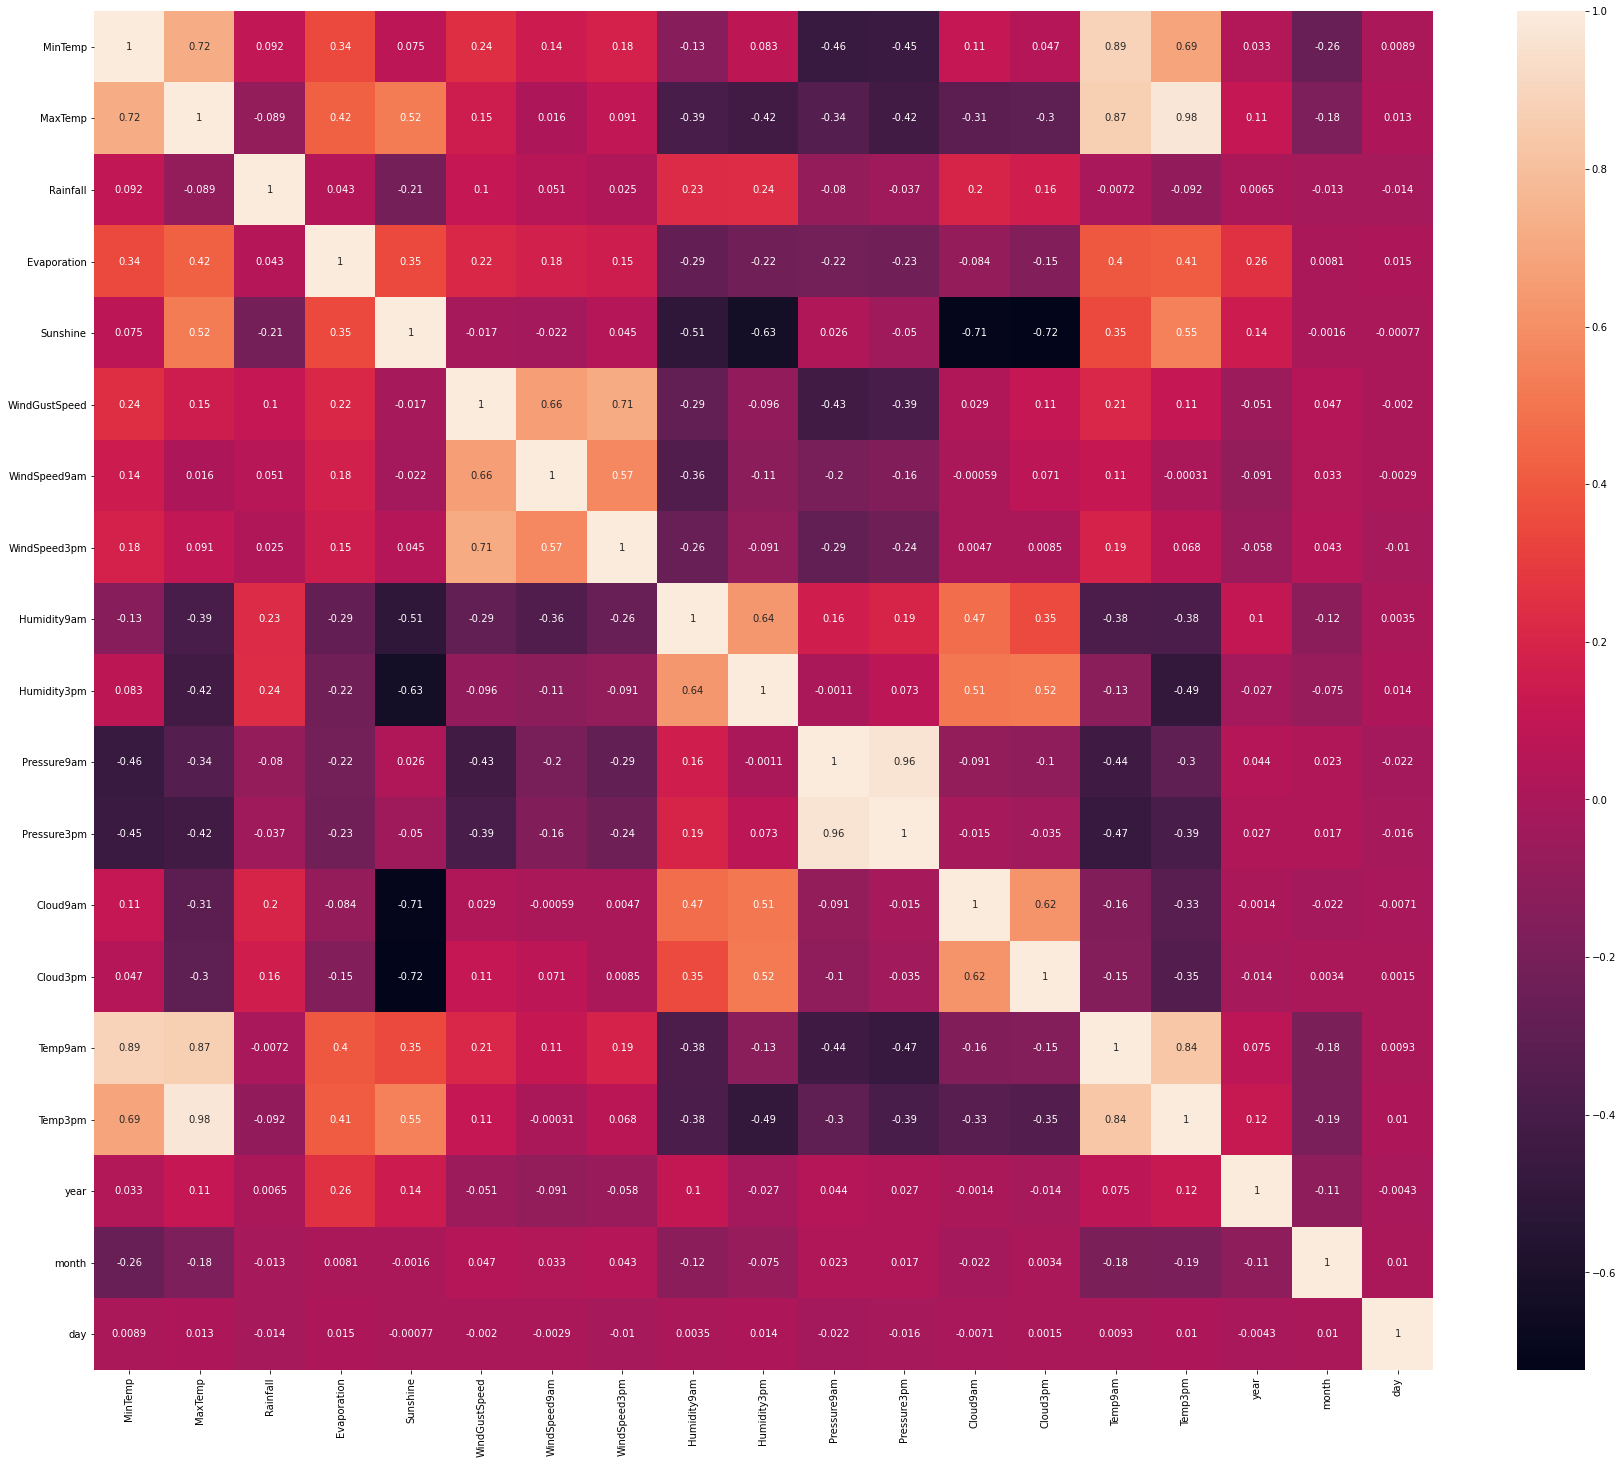

In [198]:
plt.figure(figsize=(30,25))
sns.heatmap(data1.corr(),annot=True)

In [39]:
data1.drop(['Pressure9am','Temp9am','MaxTemp'],axis=1,inplace=True)

In [40]:
X.drop(['Pressure9am','Temp9am','MaxTemp'],axis=1,inplace=True)

<AxesSubplot:>

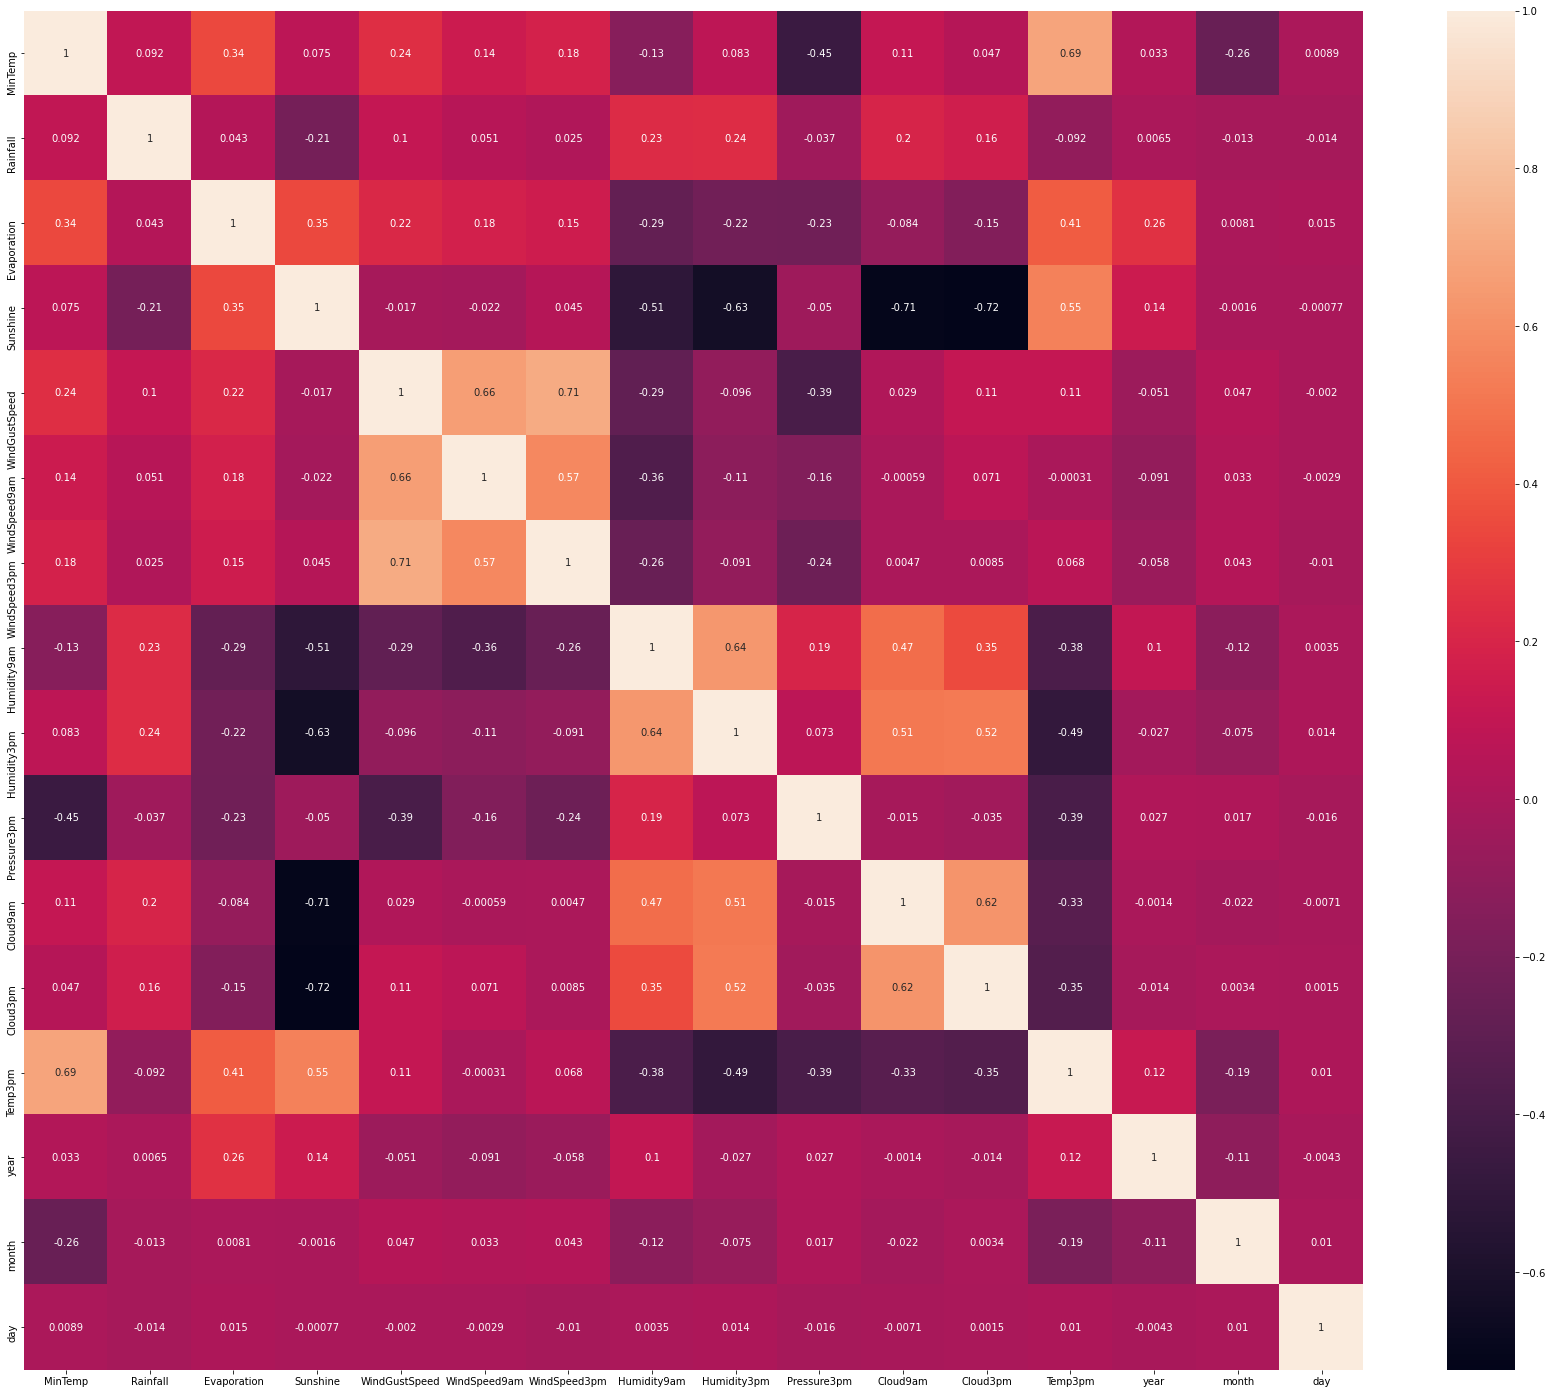

In [200]:
plt.figure(figsize=(30,25))
sns.heatmap(data1.corr(),annot=True)

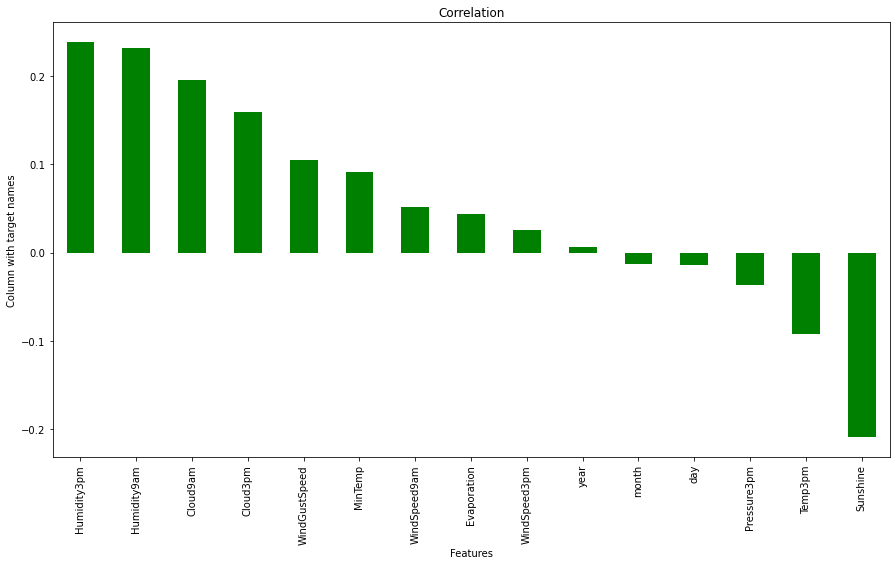

In [203]:
plt.figure(figsize =(15, 8),facecolor='white')
data1.corr()['Rainfall'].sort_values(ascending = False).drop(['Rainfall']).plot(kind ='bar', color ='green')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()


# scaling the data by using minmax scaler

In [41]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x1=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
x1

,MinTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,...,WindGustDir_4,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4
0,0.508251,0.446509,0.445231,0.500000,0.624439,0.521739,0.646341,0.172043,0.276423,1.000000,0.562267,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.310231,0.446509,0.445231,0.500000,0.213597,0.478261,0.317073,0.204301,0.295393,0.568546,0.562267,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.491749,0.446509,0.445231,0.527027,0.604999,0.565217,0.243902,0.258065,0.319783,0.568546,0.250000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.369637,0.446509,0.445231,0.229730,0.427983,0.195652,0.329268,0.107527,0.430894,0.568546,0.562267,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.643564,0.446509,0.445231,0.459459,0.316805,0.434783,0.780488,0.290323,0.246612,0.875000,1.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856,0.158416,0.446509,0.445231,0.324324,0.476643,0.239130,0.402439,0.193548,0.634146,0.568546,0.562267,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
7857,0.184818,0.446509,0.445231,0.202703,0.476643,0.195652,0.463415,0.161290,0.601626,0.568546,0.562267,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
7858,0.244224,0.446509,0.445231,0.405405,0.375146,0.195652,0.426829,0.193548,0.539295,0.568546,0.562267,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7859,0.323432,0.446509,0.445231,0.283784,0.476643,0.152174,0.402439,0.193548,0.531165,0.375000,0.250000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


In [42]:
y.shape,x1.shape

((7861,), (7861, 36))

In [43]:
#importing required libraries and models
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score

In [44]:
Maxaccu=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    predx=lr.predict(x_test)
    acc=r2_score(y_test,predx)
    if acc>Maxaccu:
        Maxaccu=acc
        maxrs=i
        
print('max r2score is',Maxaccu,'on random state of',maxrs)

max r2score is 0.40019482007258467 on random state of 675


In [45]:
#random state of 151 is giving best accuracy score
x_train,x_test,y_train,y_test=train_test_split(x1,y, test_size=0.2,random_state=675)

In [46]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('=======train results===========')
        print(f'accuracy score:{r2_score(y_train,y_pred)*100:2f}%')
        print('\n')
   
    elif train==False:
        pred=clf.predict(x_test)
        print('=======test results=========')
        print(f"r2score is:{r2_score(y_test,pred)*100:2f}%")
        print('\n')
        
def kfolds(clf, clf_name):
    clf = cross_val_score(clf, x1,y, cv=10)
    clf_score = np.average(clf)
    print(f"{clf_name} score on cross validation: {clf_score * 100}%")

In [47]:
#linear regression
lm=LinearRegression()
lm.fit(x_train,y_train)

print_score(lm,x_train,x_test,y_train,y_test,train=True)
print_score(lm,x_train,x_test,y_train,y_test,train=False)
kfolds(lm,'linearregression')

=======train results===========
accuracy score:22.117216%


=======test results=========
r2score is:40.019482%


linearregression score on cross validation: 24.833302055457747%


In [48]:
#random Forest
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)

print_score(rfc,x_train,x_test,y_train,y_test,train=True)
print_score(rfc,x_train,x_test,y_train,y_test,train=False)

kfolds(rfc,'RandomForestRegressor')

=======train results===========
accuracy score:91.592389%


=======test results=========
r2score is:51.071533%


RandomForestRegressor score on cross validation: 47.88113357527705%


In [49]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

print_score(gbr,x_train,x_test,y_train,y_test,train=True)
print_score(gbr,x_train,x_test,y_train,y_test,train=False)

kfolds(gbr,'GradientBoostingRegressor')

=======train results===========
accuracy score:70.557512%


=======test results=========
r2score is:46.298749%


GradientBoostingRegressor score on cross validation: 40.40896314547426%


In [50]:
#BaggingRegressor
from sklearn.ensemble import BaggingRegressor
bgr=BaggingRegressor()
bgr.fit(x_train,y_train)

print_score(bgr,x_train,x_test,y_train,y_test,train=True)
print_score(bgr,x_train,x_test,y_train,y_test,train=False)

kfolds(bgr,'BaggingRegressor')

=======train results===========
accuracy score:88.712609%


=======test results=========
r2score is:33.295965%


BaggingRegressor score on cross validation: 35.870656719060186%


In [51]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test,train=True)
print_score(dtr,x_train,x_test,y_train,y_test,train=False)

kfolds(dtr,'DecisionTreeRegressor')

=======train results===========
accuracy score:100.000000%


=======test results=========
r2score is:-54.616189%


DecisionTreeRegressor score on cross validation: -20.982863964830347%


In [52]:
from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test,train=True)
print_score(dtr,x_train,x_test,y_train,y_test,train=False)

kfolds(xgbr,'XGBRegressor')

=======train results===========
accuracy score:100.000000%


=======test results=========
r2score is:-54.616189%


XGBRegressor score on cross validation: 46.6429206556314%


In [ ]:
#checking evaluation metrics

In [53]:
#for randomforestregressor
y_pred=rfc.predict(x_train)
pred=rfc.predict(x_test)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('mean absolute error is:',mean_absolute_error(y_test,pred))
print('\n')
print('mean squared error is:',mean_squared_error(y_test,pred))
print('\n')
print('Root mean suared error is:',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error is: 1.7948181818181816


mean squared error is: 22.98970763827082


Root mean suared error is: 4.794758350352061


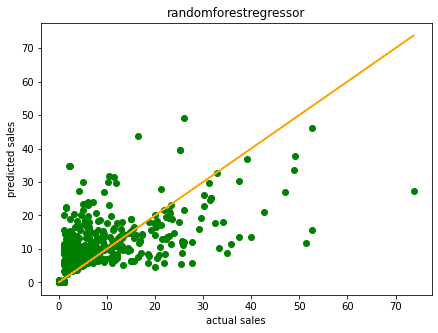

In [55]:
plt.figure(figsize=(7,5))
plt.scatter(x=y_test,y=pred,color='green')
plt.plot(y_test,y_test,color='orange')
plt.xlabel('actual sales')
plt.ylabel('predicted sales')
plt.title('randomforestregressor')
plt.show()

In [56]:
#for gradient boosting regressor
#for randomforestregressor
y_pred=xgbr.predict(x_train)
pred=xgbr.predict(x_test)

print('mean absolute error is:',mean_absolute_error(y_test,pred))
print('\n')
print('mean squared error is:',mean_squared_error(y_test,pred))
print('\n')
print('Root mean suared error is:',np.sqrt(mean_squared_error(y_test,pred)))


mean absolute error is: 1.8292801441561755


mean squared error is: 23.656640738297106


Root mean suared error is: 4.863809282681333


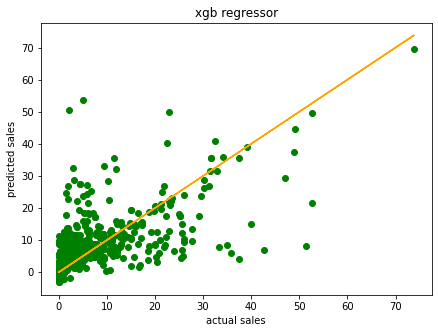

In [57]:
plt.figure(figsize=(7,5))
plt.scatter(x=y_test,y=pred,color='green')
plt.plot(y_test,y_test,color='orange')
plt.xlabel('actual sales')
plt.ylabel('predicted sales')
plt.title('xgb regressor')
plt.show()

In [58]:
#random forest regressor givesbetter results comparing with gbr i can choose rfcr

In [59]:
#regularization
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[0.001,1,0.1],'random_state':[1,3,5,6,7,9,8,10]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 1}


In [60]:
ls=Lasso(alpha=0.001,random_state=1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)

lss

0.40113167725406895

In [61]:
cv_score=cross_val_score(ls,x1,y,cv=2).mean()
cv_score

0.14037527668469374

In [62]:
#hyperparameter tunning
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

parameters={'criterion':['squared_error','absolute_error','poisson'],
             'n_estimators': [14,18],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[12,16],
             'min_samples_split': [6,9],
             'min_samples_leaf': [5,7]}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'squared_error', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 9, 'n_estimators': 18}


In [63]:
rf=RandomForestRegressor(criterion='squared_error',max_features='sqrt',max_depth=12,min_samples_leaf=5,min_samples_split=5,n_estimators=18)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

pred=rf.predict(x_test)

rfs=r2_score(y_test,pred)
print('r2score',rfs*100)

rfcscore=cross_val_score(rf,x1,y,cv=2).mean()
print('cross validation score is',rfcscore*100)

r2score 47.46417847342883
cross validation score is 20.664289497772476


In [64]:
import joblib
joblib.dump(rf,'rainfall_predction.obj')

['rainfall_predction.obj']

In [65]:
model=joblib.load('rainfall_predction.obj')
pred=model.predict(x_test)
predict_values=pd.DataFrame({'actual':y_test,'predict':pred})

In [66]:
predict_values

,actual,predict
3310,12.8,13.232950
852,0.0,0.916554
3025,0.2,0.782456
5579,2.8,4.984568
4187,9.2,10.756923
...,...,...
6154,0.0,0.004115
1001,0.0,0.248450
5628,4.4,5.527617
5056,9.4,7.239689
